## Healthcare Insurance Expenses

#### Dataset is obtained from:

https://www.kaggle.com/datasets/arunjangir245/healthcare-insurance-expenses

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import time

In [2]:
filePath = 'C:/DATASET/'

In [3]:
import os
import zipfile
if not os.path.isdir(filePath+"healthcare_insurance_kaggle"):
    with zipfile.ZipFile(filePath+'healthcare_insurance_expenses.zip', 'r') as zip_ref:
        zip_ref.extractall(filePath+'healthcare_insurance_kaggle')

In [4]:
df = pd.read_csv(filePath+'healthcare_insurance_kaggle/insurance.csv')

In [5]:
display(df.head(2))
display(df.describe())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
print("Number of rows: {0}, Number of columns: {1}".format(len(df), len(df.columns)))

Number of rows: 1338, Number of columns: 7


In [7]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

### Inspect the data

In [8]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
# binarize the 'sex' column
sex_dict = dict({'male': 0, 'female': 1})
df['sex_cla'] = df['sex'].map(sex_dict)

In [10]:
df['sex_cla'].value_counts()

0    676
1    662
Name: sex_cla, dtype: int64

In [11]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [12]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [13]:
# binarize the 'smoker' column
smoker_dict = dict({'no': 0, 'yes': 1})
df['smoker_cla'] = df['smoker'].map(smoker_dict)

In [14]:
df['smoker_cla'].value_counts()

0    1064
1     274
Name: smoker_cla, dtype: int64

In [15]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [16]:
# represents each type of 'region' column with numerical values
region_dict = dict({'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 3})
df['region_cla'] = df['region'].map(region_dict)

In [17]:
df['region_cla'].value_counts()

0    364
1    325
2    325
3    324
Name: region_cla, dtype: int64

### Categorize the numerical columns

In [18]:
# Age, bmi, and charges
cols = ['age', 'bmi', 'charges']

In [19]:
#fig, axes = plt.subplots(nrows=1, ncols=3)
#for i, ax in zip(range(len(cols)), axes.flat):
    #sns.distplot(df[cols[i]], hist=False, ax=ax)
    #plt.xlabel(cols[i])

#for i in range(len(cols)):
#    sns.displot(data=df, x=cols[i], kind="kde", row_order=1, col_order=3)
#plt.show()

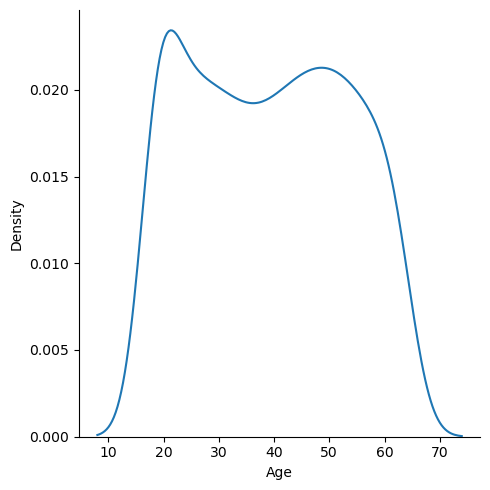

In [71]:
# Age distribution
sns.displot(data=df, x=cols[0], kind="kde")
plt.xlabel('Age')
plt.show()

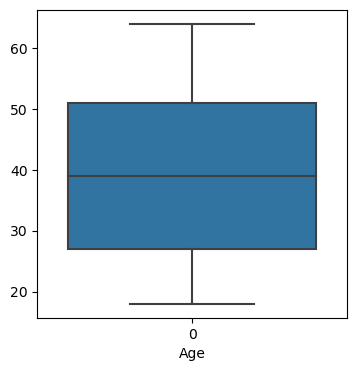

In [20]:
# Age
plt.figure(figsize=[4, 4])
sns.boxplot(df[cols[0]])
plt.xlabel('Age')
plt.show()

In [31]:
# split Age into 4 classes using np.percentile
age_percentile = np.percentile(df['age'], q=[0, 25, 50, 75, 100])
labels = ['1', '2', '3', '4']
df['age_cla'] = pd.cut(df['age'], bins=age_percentile, labels=labels,
                      include_lowest=True, right=True)

In [32]:
display(df[['age', 'age_cla']].tail(5))

,age,age_cla
1333,50,3
1334,18,1
1335,18,1
1336,21,1
1337,61,4


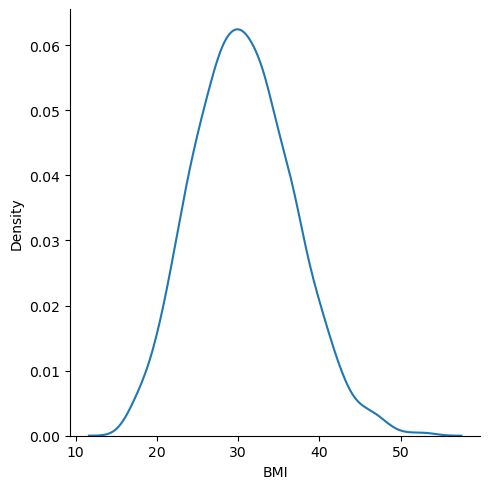

In [72]:
# BMI distrbution
sns.displot(data=df, x=cols[1], kind="kde")
plt.xlabel('BMI')
plt.show()

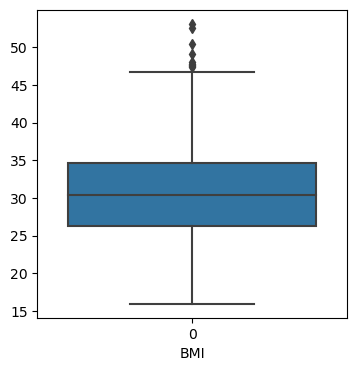

In [33]:
# BMI
plt.figure(figsize=[4, 4])
sns.boxplot(df[cols[1]])
plt.xlabel('BMI')
plt.show()

In [34]:
# split BMI into 4 classes using np.percentile
bmi_percentile = np.percentile(df['bmi'], q=[0, 25, 50, 75, 100])
labels = ['1', '2', '3', '4']
df['bmi_cla'] = pd.cut(df['bmi'], bins=bmi_percentile, labels=labels,
                       include_lowest=True, right=True)

In [35]:
display(df[['bmi', 'bmi_cla']].tail(5))

,bmi,bmi_cla
1333,30.97,3
1334,31.92,3
1335,36.85,4
1336,25.80,1
1337,29.07,2


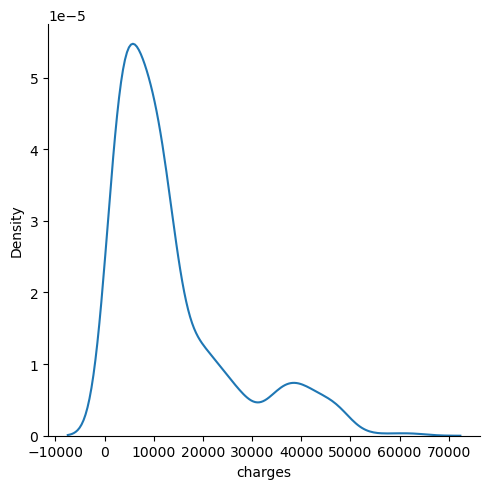

In [73]:
# charges distribution
sns.displot(data=df, x=cols[2], kind="kde")
plt.xlabel('charges')
plt.show()

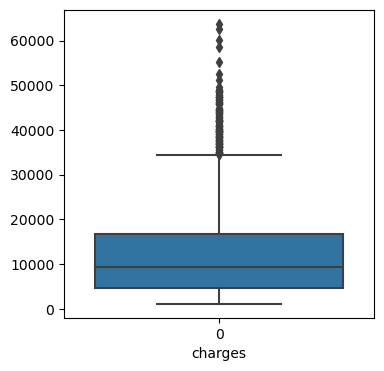

In [74]:
# charges
plt.figure(figsize=[4, 4])
sns.boxplot(df[cols[2]])
plt.xlabel('charges')
plt.show()

In [37]:
# split charges into 4 classes using np.percentile
charges_percentile = np.percentile(df['charges'], q=[0, 25, 50, 75, 100])
labels = ['1', '2', '3', '4']
df['charges_cla'] = pd.cut(df['charges'], bins=charges_percentile, labels=labels,
                           include_lowest=True, right=True)

In [38]:
display(df[['charges','charges_cla']].tail(10))

,charges,charges_cla
1328,22395.74424,4
1329,10325.20600,3
1330,12629.16560,3
1331,10795.93733,3
1332,11411.68500,3
1333,10600.54830,3
1334,2205.98080,1
1335,1629.83350,1
1336,2007.94500,1
1337,29141.36030,4


### Bayesian Classification

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB

In [76]:
X = df[['age_cla', 'bmi_cla', 'children', 'sex_cla', 'smoker_cla', 'region_cla']].astype('category')
y = df['charges_cla'].astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                shuffle=True, stratify=y, random_state=1234)

In [77]:
model1 = CategoricalNB()

In [78]:
model1.fit(X_train, y_train)

CategoricalNB()

In [79]:
y_pred = model1.predict(X_test)

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {0:.2f}%".format(accuracy * 100.0))

Accuracy: 79.10%


In [44]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[61 11  0  0]
 [ 7 53  1  0]
 [ 2 12 48  4]
 [ 0  7  8 54]]


In [45]:
# Remove correlated variables -- using Chi Square test of independence
# df[['age_cla', 'bmi_cla', 'children', 'sex_cla', 'smoker_cla', 'region_cla']]

In [46]:
list_of_cols = ['age_cla', 'bmi_cla', 'children', 'sex_cla', 'smoker_cla', 'region_cla']
num_times = sum(range(1,len(list_of_cols)-1))
for i in range(len(list_of_cols)-1):
    for j in range(i+1, len(list_of_cols)):
        crosstab = pd.crosstab(df[list_of_cols[i]], df[list_of_cols[j]])
        result = stats.chi2_contingency(crosstab)
        marker = ''
        if result[1] < 0.01:
            marker = '**'
        elif result[1] < 0.05:
            marker = '*'
        print("{} vs {} : t-stats={}, p-value= {} {}".format(
            list_of_cols[i], list_of_cols[j], result[0], result[1], marker))

age_cla vs bmi_cla : t-stats=19.428530175295847, p-value= 0.021785952043789227 *
age_cla vs children : t-stats=170.8182739127808, p-value= 1.6744196180756928e-28 **
age_cla vs sex_cla : t-stats=0.5257087351323595, p-value= 0.913208081926483 
age_cla vs smoker_cla : t-stats=2.001336447127912, p-value= 0.572129366203417 
age_cla vs region_cla : t-stats=0.5946802374503332, p-value= 0.9999360888765767 
bmi_cla vs children : t-stats=20.569317327139082, p-value= 0.15116321931214094 
bmi_cla vs sex_cla : t-stats=2.0298281116096737, p-value= 0.5662389070808094 
bmi_cla vs smoker_cla : t-stats=2.6547647461247097, p-value= 0.44796936541848587 
bmi_cla vs region_cla : t-stats=95.14095276633267, p-value= 1.5062082765488524e-16 **
children vs sex_cla : t-stats=0.7352123565685106, p-value= 0.9809803915285088 
children vs smoker_cla : t-stats=6.887719904947631, p-value= 0.22912555089568779 
children vs region_cla : t-stats=13.772791061803561, p-value= 0.5428263602033943 
sex_cla vs smoker_cla : t-sta

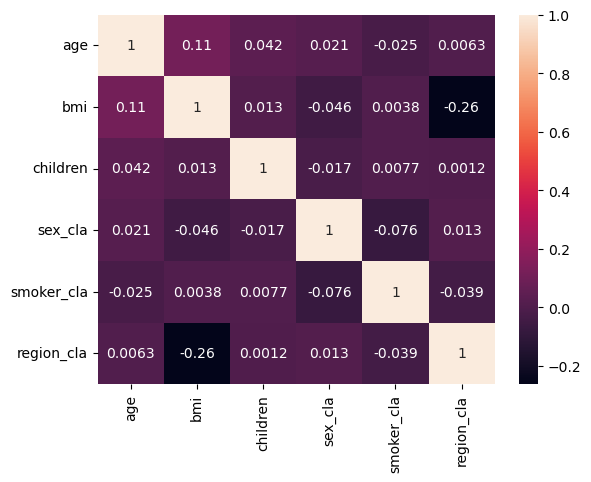

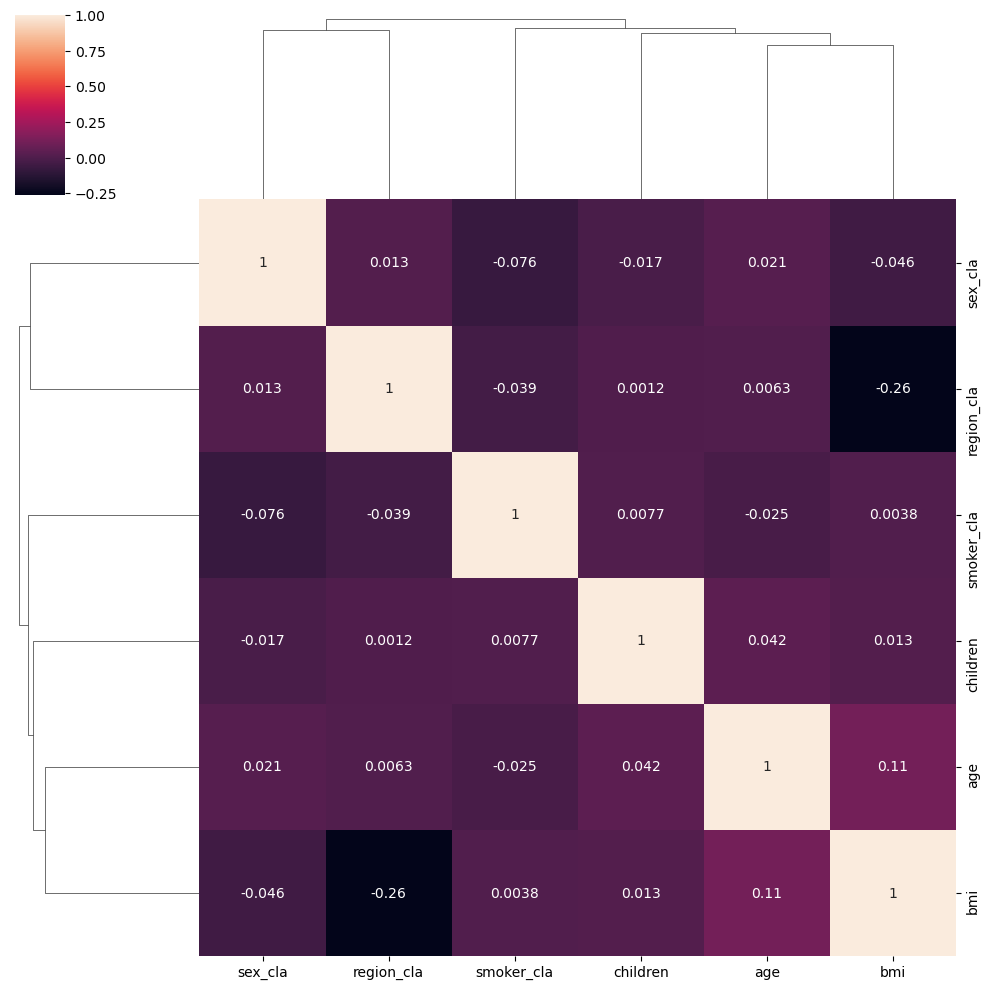

In [68]:
# perform correlation calculation
list_of_cols2 = ['age', 'bmi', 'children', 'sex_cla', 'smoker_cla', 'region_cla']

correlations = df[list_of_cols2].corr()

# plot the heatmap 
sns.heatmap(correlations, xticklabels=correlations.columns, 
            yticklabels=correlations.columns, annot=True)

# plot the clustermap 
sns.clustermap(correlations, xticklabels=correlations.columns, 
               yticklabels=correlations.columns, annot=True)

plt.show()

In [65]:
df[list_of_cols].head(5)

,age_cla,bmi_cla,children,sex_cla,smoker_cla,region_cla
0,1,2,0,1,1,1
1,1,3,1,0,0,0
2,2,3,3,0,0,0
3,2,1,0,0,0,2
4,2,2,0,0,0,2


#### Remove bmi_cla

In [92]:
X = df[['age_cla','smoker_cla','region_cla','children','sex_cla']].astype('category')
y = df['charges_cla'].astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                shuffle=True, stratify=y, random_state=1234)

In [93]:
model2 = CategoricalNB()

In [94]:
model2.fit(X_train, y_train)

CategoricalNB()

In [95]:
y_pred = model2.predict(X_test)

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {0:.2f}%".format(accuracy * 100.0))

Accuracy: 78.73%


In [96]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[56 11  0  0]
 [ 5 59  3  0]
 [ 4 11 48  4]
 [ 5  8  6 48]]


#### Attempt #3: Perfrom scaling on numerical data

In [154]:
X = pd.concat([df[['age', 'bmi']].astype('float'),
               df[['children', 'sex_cla', 'smoker_cla', 'region_cla']].astype('category')],
              axis=1)
y = df['charges_cla'].astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                shuffle=True, stratify=y, random_state=1234)

# Standard Scaler
from sklearn.preprocessing import StandardScaler

X_train_numerical = X_train.reset_index(drop=True).select_dtypes(include='number')
X_train_categorical = X_train.reset_index(drop=True).select_dtypes(include='category')

scaler = StandardScaler().fit(X_train_numerical)

# Scaling X_train
X_train_scaled = pd.concat([pd.DataFrame(scaler.transform(X_train_numerical), columns=X_train_numerical.columns),
                     X_train_categorical], axis=1, ignore_index=False)

# Scaling X_test
X_test_numerical = X_test.reset_index(drop=True).select_dtypes(include='number')
X_test_categorical = X_test.reset_index(drop=True).select_dtypes(include='category')
X_test_scaled = pd.concat([pd.DataFrame(scaler.transform(X_test_numerical), columns=X_test_numerical.columns),
                     X_test_categorical], axis=1, ignore_index=False)

In [155]:
print(X_test_scaled.head(2))

        age       bmi children sex_cla smoker_cla region_cla
0  1.253264  1.886181        1       0          1          0
1  1.182293  1.504983        0       1          0          0


In [116]:
from sklearn.naive_bayes import GaussianNB

In [123]:
model3 = GaussianNB()

In [124]:
model3.fit(X_train_scaled, y_train)

GaussianNB()

In [132]:
y_pred = model3.predict(X_test_scaled)

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {0:.2f}%".format(accuracy * 100.0))

Accuracy: 65.30%


In [133]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[62  5  0  0]
 [ 2 65  0  0]
 [ 4 59  0  4]
 [ 5 14  0 48]]


#### Support Vector Machine

In [156]:
from sklearn import svm
model4 = svm.SVC(kernel='rbf')  #kernel='linear'
model4.fit(X_train_scaled, y_train)

SVC()

In [158]:
y_pred_train = model4.predict(X_train_scaled)
y_pred_test = model4.predict(X_test_scaled)

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

accuracy1 = accuracy_score(y_train, y_pred_train)
print("Train set Accuracy: {0:.2f}%".format(accuracy1 * 100.0))
accuracy2 = accuracy_score(y_test, y_pred_test)
print("Test set Accuracy: {0:.2f}%".format(accuracy2 * 100.0))

Train set Accuracy: 91.03%
Test set Accuracy: 84.33%


In [163]:
# Use gridsearchCV on gamma and C parameters
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
}

start_time = time.time()
grid_search = GridSearchCV(estimator=svm.SVC(kernel='linear'), param_grid=param_grid,
                           cv=KFold(n_splits=5, shuffle=True, random_state=1234))
grid_search.fit(X_train_scaled, y_train)
print("time taken : {0:.2f} min".format( (time.time()-start_time)/60 ))

time taken : 0.33 min


In [164]:
# Looking at the parameters from Grid search
grid_search.best_params_

{'C': 10, 'gamma': 0.001}

In [165]:
# With the best set of parameters...
model5 = svm.SVC(kernel='rbf',
                 C=10,
                 gamma=0.01,
                 random_state = 1234)

start_time = time.time()
model5.fit(X_train_scaled,y_train)
print("time taken : {0:.2f} min".format( (time.time()-start_time)/60 ))

time taken : 0.00 min


In [166]:
y_pred_train = model5.predict(X_train_scaled)
y_pred_test = model5.predict(X_test_scaled)

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

accuracy1 = accuracy_score(y_train, y_pred_train)
print("Train set Accuracy: {0:.2f}%".format(accuracy1 * 100.0))
accuracy2 = accuracy_score(y_test, y_pred_test)
print("Test set Accuracy: {0:.2f}%".format(accuracy2 * 100.0))

Train set Accuracy: 88.97%
Test set Accuracy: 84.70%


#### K-means clustering

Using only age and bmi to compute within cluster sum of squarre (WCSS) to find optimal k value

C:\Users\powel\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\powel\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\powel\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\powel\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

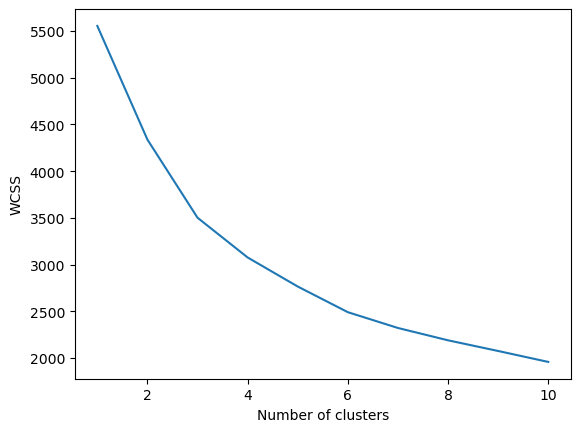

In [201]:
# Using Elbow curve method to find the optimal 'k' value

#X = dataset.iloc[:, [3, 4]].values
#dataset = pd.read_csv('Mall_Customers.csv') 

from sklearn.cluster import KMeans

# Using the elbow method to find the optimal number of clusters 
wcss = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=1234)
    kmeans.fit(X_train_scaled[['age','bmi']])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [208]:
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', n_init=10, random_state = 1234) 
y_kmeans = kmeans.fit_predict(X_train_scaled[['age','bmi']])

C:\Users\powel\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [211]:
print(np.unique(y_kmeans))

[0 1 2 3]


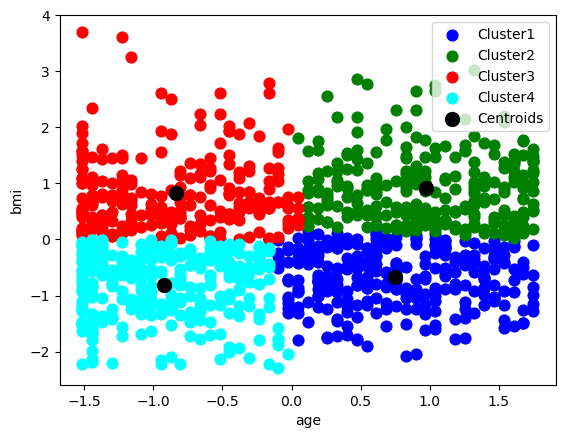

In [214]:
# Visualising the clusters
label1='age'
label2='bmi'
color = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']

for i in range(len(np.unique(y_kmeans))):
    plt.scatter(X_train_scaled[[label1]][y_kmeans == i], 
                X_train_scaled[[label2]][y_kmeans == i], s = 60, c=color[i], label = 'Cluster'+str(i+1))
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.xlabel(label1)
plt.ylabel(label2)
plt.legend() 
plt.show()

In [218]:
print(df.dtypes)

age               int64
sex              object
bmi             float64
children          int64
smoker           object
region           object
charges         float64
sex_cla           int64
smoker_cla        int64
region_cla        int64
bmi_cla        category
charges_cla    category
age_cla        category
dtype: object


#### XGBoost

In [255]:
def Preprocess_df_xgboost(df):
    #df2 = pd.concat([df[['age', 'bmi']].astype('float'),
    #           df[['children', 'sex_cla', 'smoker_cla', 'region_cla', 'charges_cla']].astype('category')],
    #          axis=1)

    # One-hot encode the "color" column
    one_hot = pd.get_dummies(df[['children', 'sex_cla', 'smoker_cla', 'region_cla']]).astype('bool')
    
    X = pd.concat([df[['age','bmi']], one_hot], axis=1)
    y = df['charges_cla']
    
    output_dict = dict(zip(y.unique(),range(len(y.unique()))))
    y = y.map(output_dict)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    shuffle=True, random_state=1234)
    
    # Standard Scaler
    from sklearn.preprocessing import StandardScaler

    X_train_numerical = X_train.reset_index(drop=True).select_dtypes(include='number')
    X_train_categorical = X_train.reset_index(drop=True).select_dtypes(include='bool')

    scaler = StandardScaler().fit(X_train_numerical)
    
    # Scaling X_train
    X_train_scaled = pd.concat([pd.DataFrame(scaler.transform(X_train_numerical), columns=X_train_numerical.columns),
                         X_train_categorical], axis=1, ignore_index=False)
    
    # Scaling X_test
    X_test_numerical = X_test.reset_index(drop=True).select_dtypes(include='number')
    X_test_categorical = X_test.reset_index(drop=True).select_dtypes(include='bool')
    X_test_scaled = pd.concat([pd.DataFrame(scaler.transform(X_test_numerical), columns=X_test_numerical.columns),
                         X_test_categorical], axis=1, ignore_index=False)
    
    y_train_resetIndex = y_train.reset_index(drop=True)
    y_test_resetIndex = y_test.reset_index(drop=True)
    
    return (X_train_scaled, X_test_scaled, y_train_resetIndex, y_test_resetIndex)

In [256]:
(X_train, X_test, y_train, y_test) = Preprocess_df_xgboost(df)
print(y_train.unique())
print(len(X_train))
display(X_train.head(2))

[0, 1, 3, 2]
Categories (4, int64): [1 < 2 < 3 < 0]
1070


,age,bmi,children,sex_cla,smoker_cla,region_cla
0,1.768444,-1.175041,False,False,True,False
1,-1.294809,-0.844506,True,False,False,True


In [262]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV

dtrain = xgb.DMatrix(X_train, label=y_train)
watchlist = [(dtrain, 'train')]
params = {'objective': 'multi:softmax', 
          'num_class': len(y_train.unique()),
          'max_depth': 6, 
          'learning_rate': 0.05}

start_time = time.time()
xg_cla = xgb.train(params=params, dtrain=dtrain, num_boost_round=10, evals=watchlist)
print("time taken : {0:.2f} min".format( (time.time()-start_time)/60 ))

[0]	train-mlogloss:1.31658
[1]	train-mlogloss:1.25336
[2]	train-mlogloss:1.19574
[3]	train-mlogloss:1.14283
[4]	train-mlogloss:1.09416
[5]	train-mlogloss:1.04913
[6]	train-mlogloss:1.00747
[7]	train-mlogloss:0.96882
[8]	train-mlogloss:0.93286
[9]	train-mlogloss:0.89908
time taken : 0.00 min


In [265]:
# model evaluation
dtrain = xgb.DMatrix(X_train, label=y_train)
y_pred_train = xg_cla.predict(dtrain)
dtest = xgb.DMatrix(X_test, label=y_test)
y_pred_test = xg_cla.predict(dtest)

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

accuracy1 = accuracy_score(y_train, y_pred_train)
print("Train set Accuracy: {0:.2f}%".format(accuracy1 * 100.0))
accuracy2 = accuracy_score(y_test, y_pred_test)
print("Test set Accuracy: {0:.2f}%".format(accuracy2 * 100.0))

Train set Accuracy: 87.76%
Test set Accuracy: 84.33%


In [266]:
# Classification model2
param_grid = {
    "objective":["reg:softmax"],
    'gamma': [0.1, 1, 10],
    'learning_rate': [0.05, 0.1, 0.3],
    "max_depth": [5, 6],
    "n_estimators": [50, 100, 150],
}

start_time = time.time()
grid_search_xgboost = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=param_grid,
                           cv=KFold(n_splits=5, shuffle=True, random_state=1234))
grid_search_xgboost.fit(X_train, y_train)
print("time taken : {0:.2f} min".format( (time.time()-start_time)/60 ))

time taken : 0.95 min


In [267]:
# Looking at the parameters from Grid search
grid_search_xgboost.best_params_

{'gamma': 1,
 'learning_rate': 0.05,
 'max_depth': 6,
 'n_estimators': 50,
 'objective': 'reg:softmax'}

In [268]:
# With the best set of parameters...
xg_cla2 = xgb.XGBClassifier(objective = "reg:softmax",
                            gamma = grid_search_xgboost.best_params_['gamma'],
                            learning_rate = grid_search_xgboost.best_params_['learning_rate'],
                            max_depth = grid_search_xgboost.best_params_['max_depth'],
                            n_estimators = grid_search_xgboost.best_params_['n_estimators'],
                            random_state = 1234)
    


start_time = time.time()
#xg_reg3 = xgb.train(params=params, dtrain=dtrain, num_boost_round=10, evals=watchlist)
xg_cla2.fit(X_train,y_train)
print("time taken : {0:.2f} min".format( (time.time()-start_time)/60 ))

time taken : 0.00 min


In [269]:
# model evaluation
y_pred_train = xg_cla2.predict(X_train)
y_pred_test = xg_cla2.predict(X_test)

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

accuracy1 = accuracy_score(y_train, y_pred_train)
print("Train set Accuracy: {0:.2f}%".format(accuracy1 * 100.0))
accuracy2 = accuracy_score(y_test, y_pred_test)
print("Test set Accuracy: {0:.2f}%".format(accuracy2 * 100.0))

Train set Accuracy: 88.60%
Test set Accuracy: 85.07%


#### Neural Network Model

In [272]:
def Preprocess_df_nn(df):
    #df2 = pd.concat([df[['age', 'bmi']].astype('float'),
    #           df[['children', 'sex_cla', 'smoker_cla', 'region_cla', 'charges_cla']].astype('category')],
    #          axis=1)

    # One-hot encode the "color" column
    #one_hot = pd.get_dummies(df[['children', 'sex_cla', 'smoker_cla', 'region_cla']]).astype('bool')
    
    #X = pd.concat([df[['age','bmi']], one_hot], axis=1)
    X = pd.concat([df[['age', 'bmi']].astype('float'),
                   df[['children', 'sex_cla', 'smoker_cla', 'region_cla', 'charges_cla']].astype('category')],
                  axis=1)
    y = df['charges_cla']
    
    output_dict = dict(zip(y.unique(),range(len(y.unique()))))
    y = y.map(output_dict)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    shuffle=True, random_state=1234)
    
    # Standard Scaler
    from sklearn.preprocessing import StandardScaler

    X_train_numerical = X_train.reset_index(drop=True).select_dtypes(include='number')
    X_train_categorical = X_train.reset_index(drop=True).select_dtypes(include='category')

    scaler = StandardScaler().fit(X_train_numerical)
    
    # Scaling X_train
    X_train_scaled = pd.concat([pd.DataFrame(scaler.transform(X_train_numerical), columns=X_train_numerical.columns),
                         X_train_categorical], axis=1, ignore_index=False)
    
    # Scaling X_test
    X_test_numerical = X_test.reset_index(drop=True).select_dtypes(include='number')
    X_test_categorical = X_test.reset_index(drop=True).select_dtypes(include='category')
    X_test_scaled = pd.concat([pd.DataFrame(scaler.transform(X_test_numerical), columns=X_test_numerical.columns),
                         X_test_categorical], axis=1, ignore_index=False)
    
    y_train_resetIndex = y_train.reset_index(drop=True)
    y_test_resetIndex = y_test.reset_index(drop=True)
    
    return (X_train_scaled, X_test_scaled, y_train_resetIndex, y_test_resetIndex)

In [273]:
(X_train, X_test, y_train, y_test) = Preprocess_df_nn(df)
print(y_train.unique())
print(len(X_train))
display(X_train.head(2))

[0, 1, 3, 2]
Categories (4, int64): [1 < 2 < 3 < 0]
1070


,age,bmi,children,sex_cla,smoker_cla,region_cla,charges_cla
0,1.768444,-1.175041,0,0,1,0,4
1,-1.294809,-0.844506,2,0,0,3,1


In [307]:
import tensorflow as tf
from keras import regularizers
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [315]:
# define base model
def baseline_model(X, y):
    # create model
    nodes = len(X.columns)
    #print(nodes)
    #print(nodes//2)
    model = Sequential()
    model.add(Dense(nodes, input_shape=(nodes,), kernel_initializer='normal', 
                    kernel_regularizer=regularizers.l2(0.0001),
                    activation=tf.nn.relu))
    model.add(Dense(nodes//2, kernel_initializer='normal',
             kernel_regularizer=regularizers.l2(0.0001), activation=tf.nn.relu)) #hidden layer 1
    #model.add(Dropout(0.1))
    model.add(Dense(len(y.unique()), kernel_initializer='normal', activation=tf.nn.softmax))
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
    return model

In [316]:
# evaluate model
estimator = KerasClassifier(model=baseline_model(X_train,y_train), 
                           optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'],
                           epochs=10,
                           batch_size = 1, #math.ceil(X_train.shape[0]/2),  #-1, 1, X_train.shape[0], 
                           random_state=1234,
                           verbose=1)

In [317]:
start_time = time.time()
estimator.fit(X_train, y_train)
print("time taken : {0:.2f} min".format( (time.time()-start_time)/60 ))

Epoch 1/10
1070/1070 [==============================] - 1s 728us/step - loss: 1.2100
Epoch 2/10
1070/1070 [==============================] - 1s 782us/step - loss: 0.8782
Epoch 3/10
1070/1070 [==============================] - 1s 769us/step - loss: 0.7509
Epoch 4/10
1070/1070 [==============================] - 1s 773us/step - loss: 0.6530
Epoch 5/10
1070/1070 [==============================] - 1s 771us/step - loss: 0.5459
Epoch 6/10
1070/1070 [==============================] - 1s 782us/step - loss: 0.4066
Epoch 7/10
1070/1070 [==============================] - 1s 809us/step - loss: 0.2259
Epoch 8/10
1070/1070 [==============================] - 1s 827us/step - loss: 0.1294
Epoch 9/10
1070/1070 [==============================] - 1s 818us/step - loss: 0.0749
Epoch 10/10
1070/1070 [==============================] - 1s 756us/step - loss: 0.0407
time taken : 0.15 min


In [318]:
# model evaluation
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

accuracy1 = accuracy_score(y_train, y_pred_train)
print("Train set Accuracy: {0:.2f}%".format(accuracy1 * 100.0))
accuracy2 = accuracy_score(y_test, y_pred_test)
print("Test set Accuracy: {0:.2f}%".format(accuracy2 * 100.0))

268/268 [==============================] - 0s 714us/step
Train set Accuracy: 99.81%
Test set Accuracy: 99.63%


In [320]:
# get the weights of the model:
estimator.get_params(deep=True)

{'model': <keras.engine.sequential.Sequential at 0x230f150b820>,
 'build_fn': None,
 'warm_start': False,
 'random_state': 1234,
 'optimizer': 'adam',
 'loss': 'sparse_categorical_crossentropy',
 'metrics': ['accuracy'],
 'batch_size': 1,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 10,
 'class_weight': None}

#### Pytorch method

In [350]:
import torch
import torchvision
import torch.utils.data
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

C:\Users\powel\anaconda3\envs\tensor\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [614]:
def Preprocess_df_pytorch(df):
    numerical_columns = ['age','bmi']
    categorical_columns = ['children', 'sex_cla', 'smoker_cla', 'region_cla']
    
    numerical_input = torch.Tensor([])
    for i in range(len(numerical_columns)):
        data = torch.tensor(df[numerical_columns[i]].astype('float64').values,
                          dtype=torch.float64)
        scaled_data = (data - data.min())/(data.max()-data.min())

        if numerical_input.size() == torch.Size([0]):
            numerical_input = scaled_data.reshape(1,-1)  #torch.transpose(scaled_data, 0, 1)
        else:
            numerical_input = torch.cat((numerical_input, scaled_data.reshape(1, -1)), 0)
    
    category_input = torch.Tensor([])
    for i in range(len(categorical_columns)):
        data = torch.tensor(df[categorical_columns[i]].astype('int64').values,
                          dtype=torch.int64)
        num_outputs = len(df[categorical_columns[i]].unique())

        # Define an embedding layer
        embedding_layer = nn.Embedding(num_embeddings=num_outputs, embedding_dim=3)

        # Pass the categorical data through the embedding layer
        embedded_data = embedding_layer(data)

        if category_input.size() == torch.Size([0]):
            category_input = embedded_data
        else:
            category_input = torch.cat((category_input, embedded_data), 1)
    
    # combine numerical and categorical tensors
    X = torch.cat((torch.t(numerical_input),category_input), axis=1)
    
    y = df['charges_cla']
    output_dict = dict(zip(y.unique(),range(len(y.unique()))))
    y = y.map(output_dict)
    # convert y to tensor
    y = torch.tensor(y.astype('int64').values, dtype=torch.int64)
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    shuffle=True, random_state=1234)
    
    return (X_train, X_test, y_train, y_test)

In [615]:
X_train, X_test, y_train, y_test = Preprocess_df_pytorch(df)

In [616]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

torch.Size([1070, 14])
torch.Size([1070])
torch.Size([268, 14])
torch.Size([268])


In [617]:
# set batch size
np.random.seed(1234)

# np.array sample
X_train_ind = np.array(range(X_train.size(0)))
batch=[]
batch_size=32

while len(X_train_ind) != 0:
    ind = range(len(X_train_ind))
    if len(X_train_ind) >= batch_size:
        cur_ind =  np.random.choice(ind, batch_size, replace=False)
    else:
        cur_ind =  ind
    batch.append(X_train_ind[cur_ind])
    X_train_ind = np.delete(X_train_ind,cur_ind)

In [670]:
# Define the class Net
class Net(nn.Module):
    def __init__(self):
        self.num_features = 14
        self.num_classes = 4
        
        # Define all the parameters of the net
        super(Net, self).__init__()
        self.fc1 = nn.Linear(self.num_features, 2000)
        self.fc2 = nn.Linear(2000, 500)
        self.fc3 = nn.Linear(500, self.num_classes)

    def forward(self, x):   
        # Do the forward pass
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [671]:
# Instantiate the Adam optimizer and Cross-Entropy loss function
model = Net()   
optimizer = optim.Adam(model.parameters(), lr=3e-4)
criterion = nn.CrossEntropyLoss() #nn.MultiLabelSoftMarginLoss()
  
for batch_idx, data_ind in enumerate(batch):
    data = X_train[data_ind]
    target = y_train[data_ind]
    
    # zero the parameter gradients
    optimizer.zero_grad()

    # Complete a forward pass
    output = model(data.float())

    #print(target.shape)
    #print(output.shape)
    
    # Compute the loss, gradients and change the weights
    loss = criterion(output, target)   
    #loss.backward()             # COMPUTE THE GRADIENTS OF THE WEIGHTS
    loss.backward(retain_graph=True)
    
    optimizer.step()            # CHANGE THE WEIGHTS USING ADAM'S OPTIMIZER
    
    # zero the parameter gradients
    #optimizer.zero_grad()
    

# Set the model in eval mode
model.eval()

Net(
  (fc1): Linear(in_features=14, out_features=2000, bias=True)
  (fc2): Linear(in_features=2000, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=4, bias=True)
)

In [672]:
# Do the forward pass and get the predictions
outputs_test = model(X_test.float())
_, outputs_test = torch.max(outputs_test.data, 1)

In [673]:
total = y_test_tensor.size(0)
correct = (outputs_test == y_test_tensor).sum().item()
print('The testing set accuracy of the network is: %d %%' % (100 * correct / total))

The testing set accuracy of the network is: 71 %
